In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df=pd.read_csv('sales_data_sample.csv',encoding='unicode-escape')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [67]:
df_drop=['CUSTOMERNAME','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','ORDERNUMBER']
df=df.drop(df_drop,axis=1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [68]:
df.drop(columns=['STATUS','ORDERDATE','QTR_ID','MONTH_ID','YEAR_ID'],inplace=True)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,Motorcycles,95,S10_1678,USA,Medium


In [74]:
from sklearn.preprocessing import * 
def convert_categories(col):
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col].values)


In [75]:
cat=['PRODUCTLINE','PRODUCTCODE','COUNTRY','DEALSIZE']

for col in cat:
    convert_categories(col)

In [76]:
sc=StandardScaler()
data=sc.fit_transform(df)

In [83]:
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,random_state=15,init='k-means++',n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

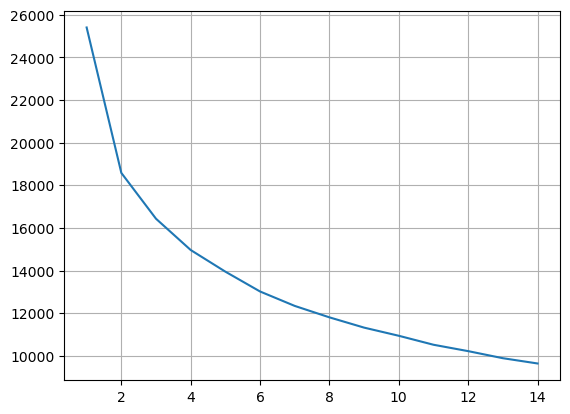

In [84]:
k=list(range(1,15))
plt.plot(k,wcss)
plt.grid()